In [1]:
#Bài 1
import numpy as np
import cv2
from scipy.ndimage import map_coordinates

img = cv2.imread("Kiwi.jpg")
M_translate = np.float32([[1, 0, 50], [0, 1, 30]])
translated = cv2.warpAffine(img, M_translate, (img.shape[1]+50, img.shape[0]+30))
def apply_wave_effect(channel):
    coords_y, coords_x = np.meshgrid(
        np.arange(channel.shape[0]),
        np.arange(channel.shape[1]),
        indexing='ij'
    )
    coords_x_wave = coords_x + 20 * np.sin(2 * np.pi * coords_y / 50)
    warped = map_coordinates(channel, [coords_y, coords_x_wave], order=1, mode='reflect')
    return warped

b, g, r = cv2.split(translated)
b_wave = apply_wave_effect(b)
g_wave = apply_wave_effect(g)
r_wave = apply_wave_effect(r)
warped_image = cv2.merge([
    b_wave.astype(np.uint8),
    g_wave.astype(np.uint8),
    r_wave.astype(np.uint8)
])
cv2.imwrite("kiwi_wave.jpg", warped_image)

True

In [3]:
#Bài 2
import cv2
import numpy as np
from PIL import Image
duahau = cv2.imread("duahau.jpg")
dudu = cv2.imread("dudu.jpg")
h = max(duahau.shape[0], dudu.shape[0])
w = max(duahau.shape[1], dudu.shape[1])
duahau = cv2.resize(duahau, (w, h))
dudu = cv2.resize(dudu, (w, h))

def apply_gradient(img, color_start, color_end):
    gradient = np.linspace(color_start, color_end, img.shape[1])
    gradient = np.tile(gradient, (img.shape[0], 1, 1)).astype(np.uint8)
    return gradient

gradient_dudu = apply_gradient(dudu, [0, 0, 255], [0, 255, 0])
gradient_duahau = apply_gradient(duahau, [0, 255, 255], [255, 0, 255])

def blend(img, gradient, alpha=0.6):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    blended = cv2.addWeighted(img, 1 - alpha, gradient, alpha, 0)
    return blended

dudu_colored = blend(dudu, gradient_dudu)
duahau_colored = blend(duahau, gradient_duahau)

combined = np.concatenate((dudu_colored, duahau_colored), axis=1)

transparent = np.zeros((combined.shape[0], combined.shape[1], 4), dtype=np.uint8)
transparent[:, :, :3] = combined
transparent[:, :, 3] = 255 

Image.fromarray(transparent).save("fruits_combined.png")


In [4]:
#Bài 3
import cv2
import numpy as np

def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def vertical_mirror(image):
    return cv2.flip(image, 0)

img_mountain = cv2.imread("nuis.jpg")
img_boat = cv2.imread("thuyen.jpg")
target_height = 300
img_mountain = cv2.resize(img_mountain, (int(img_mountain.shape[1] * target_height / img_mountain.shape[0]), target_height))
img_boat = cv2.resize(img_boat, (int(img_boat.shape[1] * target_height / img_boat.shape[0]), target_height))
rotated_mountain = rotate_image(img_mountain, 45)
rotated_boat = rotate_image(img_boat, 45)
mirror_mountain = vertical_mirror(rotated_mountain)
mirror_boat = vertical_mirror(rotated_boat)
mountain_block = np.vstack((rotated_mountain, mirror_mountain))
boat_block = np.vstack((rotated_boat, mirror_boat))
h_max = max(mountain_block.shape[0], boat_block.shape[0])
w_total = mountain_block.shape[1] + boat_block.shape[1]
canvas = np.ones((h_max, w_total, 3), dtype=np.uint8) * 255 
canvas[:mountain_block.shape[0], :mountain_block.shape[1]] = mountain_block
canvas[:boat_block.shape[0], mountain_block.shape[1]:] = boat_block
cv2.imwrite("mountain_boat_mirror.jpg", canvas)


True

In [5]:
#Bài4
import cv2
import numpy as np
from scipy.ndimage import map_coordinates

img = cv2.imread("Chua.jpg")
zoom_factor = 5
img_zoomed = cv2.resize(img, (img.shape[1]*zoom_factor, img.shape[0]*zoom_factor), interpolation=cv2.INTER_LINEAR)
coords = np.meshgrid(np.arange(img_zoomed.shape[0]), np.arange(img_zoomed.shape[1]), indexing='ij')
coords_x = coords[0] + 30 * np.sin(2 * np.pi * coords[1] / 150)
coords_y = coords[1]
coords_stack = np.array([coords_x, coords_y])
warped_channels = []
for i in range(3):  # R, G, B
    warped = map_coordinates(img_zoomed[:, :, i], coords_stack, order=1, mode='reflect')
    warped_channels.append(warped)
warped_img = np.stack(warped_channels, axis=-1).astype(np.uint8)
cv2.imwrite("pagoda_warped.jpg", warped_img)


True

Chọn ảnh (1, 2 hoặc 3):

--- Menu Biến Đổi Ảnh ---
1. Tịnh tiến
2. Xoay
3. Phóng to/thu nhỏ
4. Làm mờ Gaussian
5. Biến đổi sóng
6. Thoát


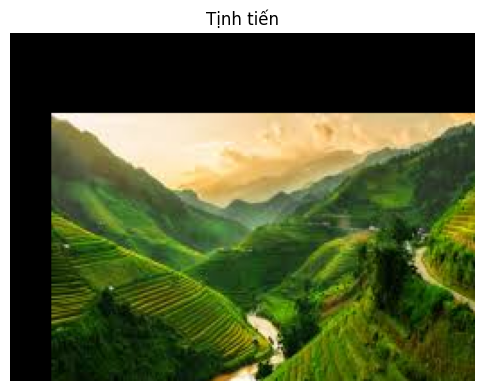


--- Menu Biến Đổi Ảnh ---
1. Tịnh tiến
2. Xoay
3. Phóng to/thu nhỏ
4. Làm mờ Gaussian
5. Biến đổi sóng
6. Thoát


In [6]:
#Bài 5
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_image(img, title="Ảnh"):
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

images = {
    "1": cv2.imread("nuis.jpg"),
    "2": cv2.imread("Chua.jpg"),
    "3": cv2.imread("thuyen.jpg")
}

print("Chọn ảnh (1, 2 hoặc 3):")
img_choice = input("Nhập số ảnh: ")
img = images.get(img_choice)

if img is None:
    print("Ảnh không hợp lệ.")
else:
    while True:
        print("\n--- Menu Biến Đổi Ảnh ---")
        print("1. Tịnh tiến")
        print("2. Xoay")
        print("3. Phóng to/thu nhỏ")
        print("4. Làm mờ Gaussian")
        print("5. Biến đổi sóng")
        print("6. Thoát")
        choice = input("Chọn phép biến đổi (1-6): ")

        if choice == "1":
            dx = int(input("Nhập số pixel dịch chuyển theo X: "))
            dy = int(input("Nhập số pixel dịch chuyển theo Y: "))
            M = np.float32([[1, 0, dx], [0, 1, dy]])
            img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
            show_image(img, "Tịnh tiến")

        elif choice == "2":
            angle = float(input("Nhập góc xoay: "))
            reshape = input("Giữ kích thước gốc? (True/False): ").lower() == "true"
            (h, w) = img.shape[:2]
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, angle, 1.0)
            if reshape:
                rotated = cv2.warpAffine(img, M, (w, h))
            else:
                rotated = cv2.warpAffine(img, M, (w, h))
            img = rotated
            show_image(img, "Xoay")

        elif choice == "3":
            zoom = float(input("Nhập hệ số zoom: "))
            img = cv2.resize(img, None, fx=zoom, fy=zoom)
            show_image(img, "Phóng to/thu nhỏ")

        elif choice == "4":
            sigma = float(input("Nhập giá trị sigma: "))
            ksize = int(6*sigma+1) if int(6*sigma+1)%2==1 else int(6*sigma+2)
            img = cv2.GaussianBlur(img, (ksize, ksize), sigma)
            show_image(img, "Gaussian Blur")

        elif choice == "5":
            wave = int(input("Nhập biên độ sóng: "))
            rows, cols = img.shape[:2]
            wave_img = np.zeros_like(img)
            for i in range(rows):
                offset = int(wave * np.sin(2 * np.pi * i / 60))
                for j in range(cols):
                    if 0 <= j+offset < cols:
                        wave_img[i, j] = img[i, (j+offset)%cols]
            img = wave_img
            show_image(img, "Biến dạng sóng")

        elif choice == "6":
            print("Kết thúc chương trình.")
            break

        else:
            print("Lựa chọn không hợp lệ.")
